In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random

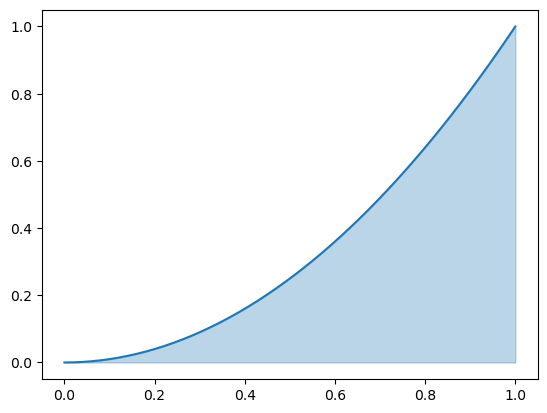

In [4]:
# 구간 [0, 1] 위에서 함수 y=x^2으로 둘러싸인 영역 그리기 
x = np.linspace(0, 1)
plt.plot(x, x**2)
plt.fill_between(x, 0, x**2, color='C0', alpha=0.3)

In [2]:
# 왼쪽합과 오른쪽합을 함수로 구현
def left_sum(f, a, b, n):
    x = np.linspace(a, b, n+1)
    sum = 0
    for i in range(1, n+1):
        sum += f(x[i-1]) * (x[i] - x[i-1])
    return sum

def right_sum(f, a, b, n):
    x = np.linspace(a, b, n+1)
    sum = 0
    for i in range(1, n+1):
        sum += f(x[i]) * (x[i] - x[i-1])
    return sum

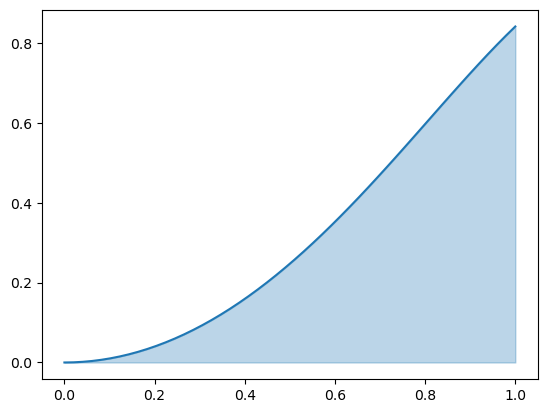

In [3]:
# 구간 [0, 1] 위의 함수 y = sin(x^2)의 그래프 아래 영역 그리기 
x = np.linspace(0, 1)
plt.plot(x, np.sin(x**2))
plt.fill_between(x, 0, np.sin(x**2), color='C0', alpha=0.3)


In [5]:
# 왼쪽합과 오른쪽합을 이용해 넓이를 소수점 아래 셋째 자리까지 근사
f = lambda x: np.sin(x**2)
eps, n = 1e-4, 10 # 1e-4는 0.0001의 과학적 표기법이다.
l, r = left_sum(f, 0, 1, n), right_sum(f, 0, 1, n)
while np.abs(l - r) > eps:
    n *= 10
    l, r = left_sum(f, 0, 1, n), right_sum(f, 0, 1, n)
print((l+r)/2)


0.3102683026238854


0.31026839177378546
0.305


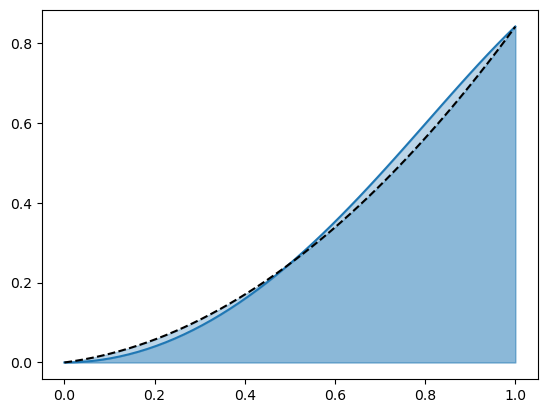

In [7]:
# 사다리꼴 공식과 심프슨 공식
f = lambda x : np.sin(x**2) 
x = np.linspace(0, 1) 
plt.plot(x, np.sin(x**2))
plt.fill_between(x, 0, np.sin(x**2), color='C0', alpha=0.3)

p_1 = lambda x: 0.693*x**2 + 0.148*x 
plt.plot(x, p_1(x), 'k--')
plt.fill_between(x, 0, p_1(x), color='C0', alpha=0.3)

print((left_sum(f, 0, 1, 1000)+ right_sum(f, 0, 1, 1000))/2)
print((p_1(0) + 4 * p_1(0.5) + p_1(1))/6)


In [22]:
# 정적분을 계산하는 함수로 심프슨 공식을 구현 
def integral(f, a, b, n):
    x = np.linspace(a, b, 2*n+1)
    sum = 0
    for i in range(1, n+1):
        sum += f(x[2*i-2]) + 4 * f(x[2*i-1]) + f(x[2*i])
    return sum * (b-a) / (6*n)


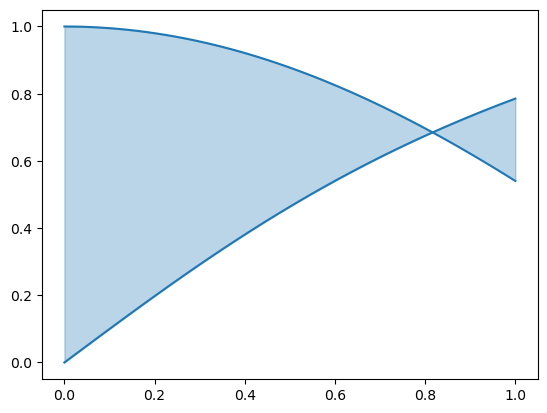

In [8]:
# 영역 (7.6)의 도식화 
f1 = lambda x: np.arctan(x)
f2 = lambda x: np.cos(x)
t = np.linspace(0, 1)
plt.plot(t, f1(t), 'C0')
plt.plot(t, f2(t), 'C0')
plt.fill_between(t, f1(t), f2(t), color='C0', alpha=0.3)

In [ ]:
# 이분법을 이용한 근의 근사
def bisect(f, a, b, eps):
    while np.abs(b - a) > eps:
        m = (a + b) / 2
        if f(m) < 0:
            a = m
        else:
            b = m
    return (a + b) / 2

f = lambda x: np.arctan(x) - np.cos(x)
x1 = bisect(f, 0, 1, 1e-4)
print(x1)

In [ ]:
g1 = lambda x: f2(x) - f1(x)
g2 = lambda x: f1(x) - f2(x)
area = integral(g1, 0, x1, 100) + integral(g2, x1, 1, 100)
print(area)

0.44753991963498096


In [9]:
# 격자분할을 이용해 구간 [0, 1] 위의 그래프 y=x^2 아래 영역의 넓이 근사
# 영역의 포함 여부를 참/거짓으로 반환하는 함수
region = lambda x, y: 0 <= x <= 1 and 0 <= y <= x**2

# [0, 1]×[0, 1]를 격자분할하고 영역의 넓이 계산
sum, n = 0, 100
xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(0, 1, n+1))
for i in range(n):
    for j in range(n):
        x = (xx[i, j] + xx[i+1, j]) / 2
        y = (yy[i, j] + yy[i, j+1]) / 2
        if region(x, y):   # 부분영역의 중심이 영역에 포함되는 경우
            sum += 1/n**2  # 부분영역의 넓이를 더함
print(sum)

0.3342999999999795


In [11]:
# 단위원의 내부에 포함되는지를 판별하는 함수를 구현
disc = lambda x, y: x**2 + y**2 <= 1

In [12]:
# 단위원에 포함되는 부분영역의 개수 세기
n, count = 10, 0
xx, yy = np.meshgrid(np.linspace(-1, 1, n+1), np.linspace(-1, 1, n+1))
for i in range(n):
    for j in range(n):
        x = (xx[i, j] + xx[i, j+1]) / 2
        y = (yy[i, j] + yy[i+1, j]) / 2
        if disc(x, y):
            count += 1
print(count)

80


In [13]:
# 2차원 영역 D의 격자분할을 이용해 3차원 영역 R의 부피 계산
region_2d = lambda x, y : 0 <= x <= 1 and -x**2 <= y <= 0
f = lambda x, y: np.sqrt(1 - y**2)

n, sum = 100, 0
xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(-1, 0, n+1))
for i in range(n):
    for j in range(n):
        x = (xx[i, j] + xx[i, j+1])/2
        y = (yy[i, j] + yy[i+1, j])/2
        if region_2d(x, y):
            sum += f(x, y) * (1/n)**2
print(sum)


0.3068092285063523


In [14]:
# 3차원 격자분할을 이용해 영역의 부피 근사
def region_3d(p):  # 영역 R의 포함 여부를 확인하는 함수
    a = 0 <= p[0] <= 1 
    b = -p[0]**2 <= p[1] <= 0 
    c = 0 <= p[2] <= np.sqrt(1-p[1]**2)
    return a and b and c

n = 50
x = np.linspace(0, 1, n+1)
y = np.linspace(-1, 0, n+1)
z = np.linspace(0, 1, n+1)
mesh = np.array(np.meshgrid(x, y, z))  # 3차원 격자점을 3차원 배열로
mesh = mesh.reshape(3, (n+1)**3)       # 2차원 배열로 재배열
count, max = 0, np.array([1, 0, 1], dtype=float)
for i in range((n+1)**3):
    if np.any(mesh[:, i] == max): 
        continue
    if region_3d(mesh[:, i] + 0.5/n*np.ones(3)):
        count += 1
print(count*(1/n)**3)

0.30556800000000006


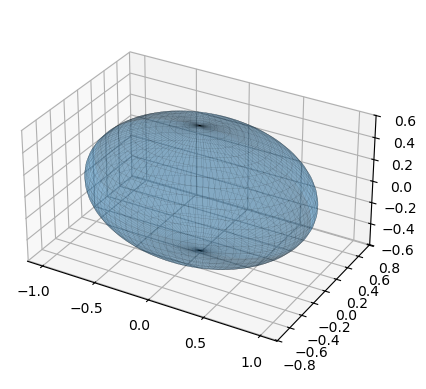

In [15]:
# 타원체 (7.10)의 그래프 그리기 
phi, theta = np.linspace(0, np.pi), np.linspace(0, 2*np.pi)
pp, tt = np.meshgrid(phi, theta)
xx = np.sin(tt)*np.cos(pp)
yy = np.sin(tt)*np.sin(pp)/np.sqrt(2)
zz = np.cos(tt)/np.sqrt(3)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.3, edgecolor='k', lw=.1)
ax.set_aspect('equal')

In [16]:
# 직육면체의 부피를 이용해 타원체 (7.10)의 부피 근사
ellipse = lambda x, y: x**2 + 2*y**2 <= 1
f = lambda x, y: 2/np.sqrt(3)*np.sqrt(1-x**2 -2*y**2)
x = np.linspace(-1, 1)
n = 50
mesh = np.array(np.meshgrid(np.linspace(-1, 1, n+1), np.linspace(-1, 1, n+1)))
mesh = mesh.reshape(2, -1)   # 격자점 좌표를 2차원 배열로 재정의
sum = 0
for i in range(mesh.shape[1]):
    if np.any(mesh[:, i] == 1):  #오른쪽 혹은 위쪽 경계 스킵(skip)
        continue
    x, y = mesh[:, i] + 1/n*np.ones(2) # 부분영역의 중심좌표
    if ellipse(x, y):                # 중심점이 타원에 속하는 경우
        sum += f(x, y) * (2/n)**2    # 직육면체의 부피 추가
print(sum)



1.7108217086211326


In [17]:
# 3차원 영역의 격자분할로 타원체 (7.10)의 부피 근사
ellipsoid = lambda p: p[0]**2 + 2*p[1]**2 + 3*p[2]**2 <= 1
f = lambda x, y: 2/np.sqrt(3)*np.sqrt(1-x**2 -2*y**2)
n = 50
intv = np.linspace(-1, 1, n+1)
mesh = np.array(np.meshgrid(intv, intv, intv))
mesh = mesh.reshape(3, -1)  # 격자점의 좌표를 2차원 배열로 재정의
count = 0
for i in range(mesh.shape[1]):
    if np.any(mesh[:, i] == 1): 
        continue
    if ellipsoid(mesh[:, i] + (1/n)*np.ones(3)):
        count += 1
        
print(count * (2/n)**3)

1.7080320000000002


In [19]:
# 리만합 구현
def riemann(f, a, b, n):
    x = np.linspace(a, b, n+1)
    sum = 0
    for i in range(1, n+1):  
        xp = np.random.uniform(x[i-1], x[i])
        sum += f(xp) * (x[i] - x[i-1])
    return sum

In [20]:
# 구간 [0, pi] 위에서 함수 y = sin(x^2)과 x축 사이의 넓이 계산
f = lambda x: np.sin(x**2)
x = [0, np.sqrt(np.pi), np.sqrt(2*np.pi), np.sqrt(3*np.pi), np.pi]
area = 0
for i in range(4):
    sum = riemann(f, x[i], x[i+1], 100)
    if sum > 0:
        area += sum
    else:
        area -= sum
print(area)

1.7325283567371903


In [28]:
# 구간 [-1, 1]에서 함수 (7.14)의 정적분 계산
f = lambda x: x*np.sin(1/x) if x != 0 else 1
print(integral(f, -1, 1, 1000))


0.7577216575601189


In [29]:
# 리만합으로 그래프 아래 영역의 부피 근사
disc = lambda x, y: x**2 + y**2 <= 1
n = 100
xx, yy = np.meshgrid(np.linspace(0, 1, n+1), np.linspace(0, 1, n+1))
sum = 0
for i in range(n):
    for j in range(n):
        x = np.random.uniform(xx[i, j], xx[i, j+1])
        y = np.random.uniform(yy[i, j], yy[i+1, j])
        if disc(x, y):
            sum += np.sqrt(1-y**2)/n**2
print(sum)


0.6668028685988496


In [30]:
# 삼변수함수의 중적분 계산
n = 20
intv = np.linspace(-1, 1, n+1)
reg = np.array(np.meshgrid(intv, intv, intv)).reshape(3, -1)
for i in range(reg.shape[1]):
    if np.any(reg[:, i] == 1): continue
    if np.sum(reg[:, i]**2) <= 1:
        sum += np.sum(reg[:, i]**2) * (2/n)**3
print(sum)

3.1459428685988535


In [32]:
# 선분을 이용한 곡선의 길이 근사
t = np.linspace(0, 2*np.pi)
c = lambda t: np.array([np.sin(t), np.cos(t)*np.sin(t)])

n = 10**3
t = np.linspace(0, 2*np.pi, n+1)
length = 0
for j in range(n):
    length += np.sqrt(np.sum((c(t[j+1]) - c(t[j]))**2))
print(length)

6.09719863656473


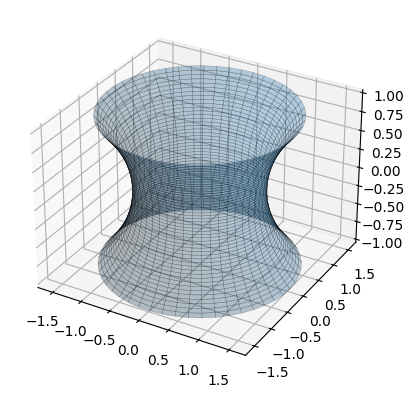

In [ ]:
# 일엽쌍곡면 그리기
zintv, tintv = np.linspace(-1, 1), np.linspace(0, 2*np.pi)
zz, tt = np.meshgrid(zintv, tintv)
ax = plt.figure().add_subplot(projection='3d')
f = lambda z: (np.exp(z) + np.exp(-z))/2
ax.plot_surface(f(zz)*np.cos(tt), f(zz)*np.sin(tt), zz, alpha=.3, lw=.3, edgecolor='k')

## 7.4 프로젝트:

In [ ]:
!pip install pygame

In [ ]:
# pygame을 이용해 게임을 제작하는 기본 코드
import pygame

tbox_w, tbox_h = 100, 50

pygame.init()
screen = pygame.display.set_mode((800, 600))
pygame.draw.rect(screen, (255, 255, 255), (0, 0, tbox_w, tbox_h))

play = True
while play:
    for event in pygame.event.get():
        # 프로그램이 정상적으로 종료되게 하기 위한 필수 코드
        if event.type == pygame.QUIT:
            play = False
    pygame.display.flip()  # 화면 갱신을 위한 필수 코드

pygame.quit()

In [ ]:
# 마우스 입력을 처리하는 프로그램 제작
import pygame

tbox_w, tbox_h = 100, 50

pygame.init()
screen = pygame.display.set_mode((800, 600))
pygame.draw.rect(screen, (255, 255, 255), (0, 0, tbox_w, tbox_h))

play = True
while play:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            play = False
        # 마우스가 한 번 클릭되었는지 확인
        if event.type == pygame.MOUSEBUTTONDOWN:
            if pygame.mouse.get_pressed()[0]:   # 마우스 왼쪽 버튼
                x, y = pygame.mouse.get_pos()   # 커서 위치 반환
                # 반지름이 3(픽셀)인 흰색 원 그리기
                pygame.draw.circle(screen, (255, 255, 255), (x, y), 3)
    # 0번째 마우스 버튼(마우스 왼쪽 버튼)이 눌려져 있는 경우
    if pygame.mouse.get_pressed()[0]:
        new_x, new_y = pygame.mouse.get_pos()   # 새 커서 위치 반환
        # 이전 마우스 커서 위치로부터 현재 마우스 커서 위치까지 흰색 선 그리기
        pygame.draw.line(screen, (255, 255, 255), (x, y), (new_x, new_y), 5)
        x, y = new_x, new_y   # 이전 마우스 커서를 현재 위치로 치환
    pygame.display.flip()     # 화면 갱신
 
pygame.quit()


ModuleNotFoundError: No module named 'pygame'

넓이 구하는 게임 프로젝트 구현 코드는 `crofton.py` 참조